## Linear Regression with Pytorch

In [106]:
import matplotlib.pyplot as plt

In [107]:
import torch
from torch import nn
torch.manual_seed(12)


class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype = torch.float))
        
    # Forward method to define the computation method in the model
    def forward(self, feature: torch.Tensor) -> torch.Tensor: # feature: is the input data
        return self.weights * feature + self.bias
        
        

In [108]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Device: {device}")

Device: mps


In [109]:
# Instantiate a model
model_fn = LinearRegression().to(device)
model_fn.weights , model_fn.bias

(Parameter containing:
 tensor([-0.2138], device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([-1.3780], device='mps:0', requires_grad=True))

In [110]:
# Training set
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim = 1)
y = 0.7 * X + 0.3  


In [111]:
# Testing set
X_test = torch.arange(start=90, end=91, step=0.02).unsqueeze(dim=1)
y_test = 0.7 * X_test + 0.3

In [112]:
with torch.inference_mode():
    y_preds = model_fn(X.to(device))
    
y_preds

tensor([[-1.3780],
        [-1.3822],
        [-1.3865],
        [-1.3908],
        [-1.3951],
        [-1.3993],
        [-1.4036],
        [-1.4079],
        [-1.4122],
        [-1.4164],
        [-1.4207],
        [-1.4250],
        [-1.4293],
        [-1.4336],
        [-1.4378],
        [-1.4421],
        [-1.4464],
        [-1.4507],
        [-1.4549],
        [-1.4592],
        [-1.4635],
        [-1.4678],
        [-1.4720],
        [-1.4763],
        [-1.4806],
        [-1.4849],
        [-1.4891],
        [-1.4934],
        [-1.4977],
        [-1.5020],
        [-1.5063],
        [-1.5105],
        [-1.5148],
        [-1.5191],
        [-1.5234],
        [-1.5276],
        [-1.5319],
        [-1.5362],
        [-1.5405],
        [-1.5447],
        [-1.5490],
        [-1.5533],
        [-1.5576],
        [-1.5618],
        [-1.5661],
        [-1.5704],
        [-1.5747],
        [-1.5789],
        [-1.5832],
        [-1.5875]], device='mps:0')

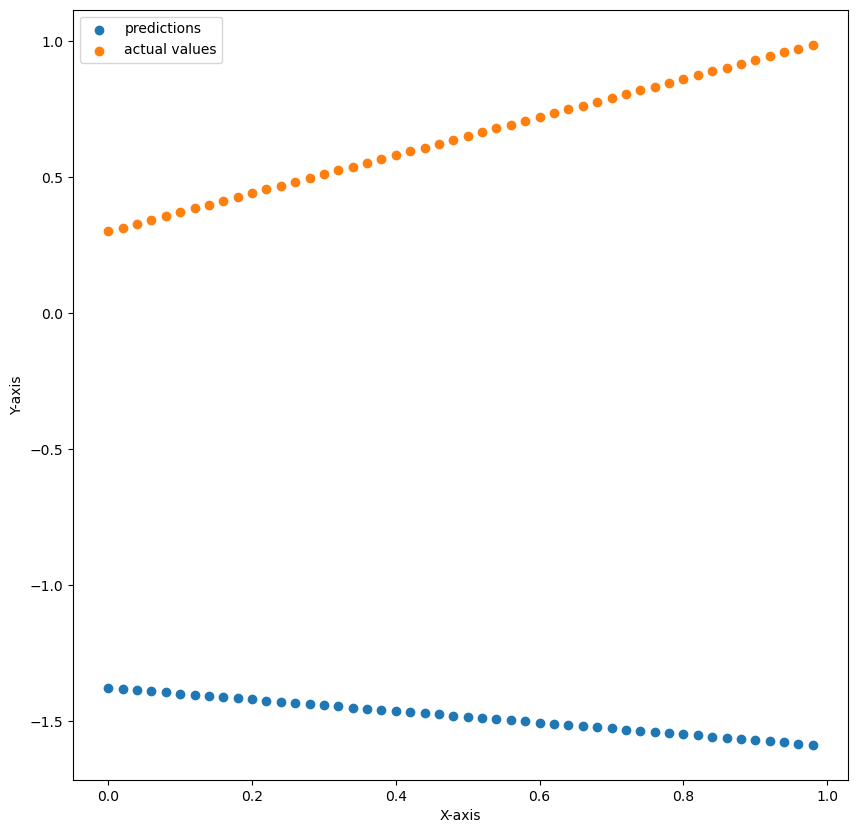

In [114]:
def plot_predictions_and_targets(features, predictions, targets):
    plt.figure(figsize=(10,10))
    plt.scatter(features, predictions, label = "predictions")
    plt.scatter(features, targets, label = "actual values")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()
    
plot_predictions_and_targets(X.to("cpu"), y_preds.to("cpu"), y.to("cpu"))

In [115]:
model_fn.state_dict()

OrderedDict([('weights', tensor([-0.2138], device='mps:0')),
             ('bias', tensor([-1.3780], device='mps:0'))])

In [116]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params= model_fn.parameters(), lr=0.01, momentum=0.9)

In [119]:
epochs = 500

for epoch in range(epochs):
    
    # Training session
     model_fn.train()
     y_pred = model_fn(X.to(device))
     loss = loss_fn(y_pred.to(device), y.to(device))
     optimizer.zero_grad() 
     loss.backward()
     optimizer.step()

     model_fn.eval()

     with torch.inference_mode():
            test_pred = model_fn(X_test.to(device))
        
            test_loss = loss_fn(test_pred.to(device), y_test.to(device)) # Test loss
    
     if epoch % 10 == 0: print(f"Epoch: {epoch}\nTest Loss: {test_loss:}\n\n")


Epoch: 0
Test Loss: 6151.517578125


Epoch: 10
Test Loss: 0.8403819799423218


Epoch: 20
Test Loss: 607.1368408203125


Epoch: 30
Test Loss: 1.4832007884979248


Epoch: 40
Test Loss: 114.60163879394531


Epoch: 50
Test Loss: 2.9902713298797607


Epoch: 60
Test Loss: 4.5659499168396


Epoch: 70
Test Loss: 0.4122346043586731


Epoch: 80
Test Loss: 3.595345973968506


Epoch: 90
Test Loss: 0.6525962948799133


Epoch: 100
Test Loss: 0.037761934101581573

Epoch: 110
Test Loss: 0.18809367716312408


Epoch: 120
Test Loss: 0.30665427446365356


Epoch: 130
Test Loss: 0.14980559051036835


Epoch: 140
Test Loss: 0.07007303833961487


Epoch: 150
Test Loss: 0.06485318392515182


Epoch: 160
Test Loss: 0.058649659156799316


Epoch: 170
Test Loss: 0.03933809697628021


Epoch: 180
Test Loss: 0.025934381410479546


Epoch: 190
Test Loss: 0.019789330661296844


Epoch: 200
Test Loss: 0.015266351401805878


Epoch: 210
Test Loss: 0.011001636274158955


Epoch: 220
Test Loss: 0.007860766723752022


Epoch: 230
T

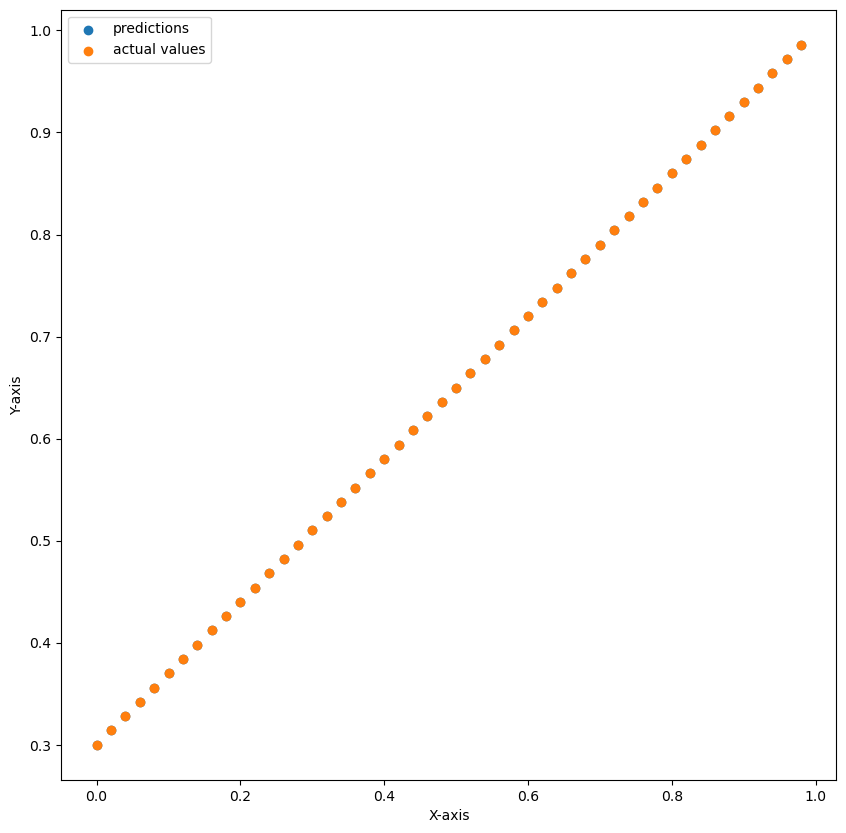

In [133]:
y_preds_train = model_fn(X.to(device)).cpu()
plot_predictions_and_targets(X.detach().numpy(), y_preds_train.detach().numpy(), y.detach().numpy())

In [134]:
# Saving model
torch.save(model_fn.state_dict(), "linear_regression_model.pth")

In [138]:
model_new = LinearRegression().to(device)
model_new.load_state_dict(torch.load("linear_regression_model.pth"))
model_new(X_test.to(device)) == model_fn(X_test.to(device))

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')

## Classification with Pytorch